# 1. Data Wrangling (Titanic)
https://www.kaggle.com/c/titanic/overview

## _Imports_
**Import _pandas_**

In [1]:
import pandas as pd

Pandas includes numpy as `np`, and it's convenient to have this available directly:

In [2]:
np = pd.np

**Import the dataframe, read it into a Panda's DataFrames and assign it to df.**

In [3]:
df = pd.read_csv('data/titanic/train.csv')

In [79]:
holdout = pd.read_csv('data/titanic/test.csv')

In [6]:
?pd.read_csv()

**Data Dictionary**

|Variable|Definition|Key|
| --- | --- | --- |
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|


**Variable Notes**  
pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

**Have a look at the first 5 rows of df using the head method**

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Have a look at the last 3 rows of df using the tail method**

In [8]:
?pd.DataFrame.tail()

In [9]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Using the _shape_ attribute, have a look at the diamensionality of the datasets.**

In [10]:
df.shape

(891, 12)

**Get the names of the columns and info about them (number of non null and type).**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Use the describe method to see how the data is distributed (numerical features only!).**

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Note:** You can use pandas_profiling.ProfileReport(df) to get a detailled report on df (can be long to run depending on the isze of the data).

**We can also get a list of the columns names:**

In [13]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### Change the number of rows diplayed by pandas

In [14]:
pd.options.display.max_rows

60

In [15]:
pd.options.display.max_rows = 15

___
## _Subsetting_
We can subset a dataframe by label, by index or a combination of both.  
There are different ways to do it, using .loc, .iloc and also [ ]. See documentation:  
https://pandas.pydata.org/pandas-docs/stable/indexing.html

**Let's have a look at the 'total_time' column:**

In [16]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
5      3
6      1
      ..
884    3
885    3
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

**Then at the 12th observation:**

In [17]:
df.iloc[11]

PassengerId                          12
Survived                              1
Pclass                                1
Name           Bonnell, Miss. Elizabeth
Sex                              female
Age                                  58
SibSp                                 0
Parch                                 0
Ticket                           113783
Fare                              26.55
Cabin                              C103
Embarked                              S
Name: 11, dtype: object

In [18]:
df.loc[11]

PassengerId                          12
Survived                              1
Pclass                                1
Name           Bonnell, Miss. Elizabeth
Sex                              female
Age                                  58
SibSp                                 0
Parch                                 0
Ticket                           113783
Fare                              26.55
Cabin                              C103
Embarked                              S
Name: 11, dtype: object

**At the 'Name' of the last three observations:**

In [19]:
df.iloc[-3:, 3]

888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [20]:
 df.loc[888:, 'Name']

888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, dtype: object

**And finally look at the 'Age' and 'Fare' of the 45th, the 1rst and the 8th observations:**

In [21]:
df.iloc[[44, 0, 7], [4, 7]]

,Sex,Parch
44,female,0
0,male,0
7,male,1


In [22]:
df.loc[[44, 7, 0], ['Age', 'Fare']]

,Age,Fare
44,19.0,7.8792
7,2.0,21.0750
0,22.0,7.2500


**!!WARNING!!**  Unlike Python and ``.iloc``, the end value in a range specified by ``.loc`` **includes** the last index specified.

In [23]:
df.iloc[5:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [24]:
df.loc[5:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


___
## Let's clean here and there

### 'Sex' column

**Get the count of the different values of the 'Sex' column.**

In [25]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**Labelise this column.**

In [26]:
dico_sex = {'male':0, 'female':1}
df['sex_lab'] = df['Sex'].map(dico_sex)

In [27]:
df['sex_lab'].value_counts()

0    577
1    314
Name: sex_lab, dtype: int64

### 'Embarked' column

**Get the proportion of the different values of the 'Embarked' column.**

In [28]:
df['Embarked'].value_counts(normalize = True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

**Labelise this column.**

**April 10, 1912:**   
From 9:30 a.m. until 11:30 a.m., passengers board the ship. Then at noon, the Titanic leaves the dock at Southhampton for its maiden voyage.  
First stop is in Cherbourg, France, where the Titanic arrives at 6:30 p.m. and leaves at 8:10 p.m, heading to Queenstown, Ireland (now known as Cobh).  
It is carrying 2,229 passengers and crew.  
https://www.thoughtco.com/titanic-timeline-1779210

In [29]:
dico_emb = {'S':1, 'C':2, 'Q':3}
df['embarked_lab'] = df['Embarked'].map(dico_emb)

**Get the proportion of the different values of the 'embarked_lab' column, including the NaN values.**

In [30]:
df['embarked_lab'].value_counts(normalize = True, dropna=False)

 1.0    0.722783
 2.0    0.188552
 3.0    0.086420
NaN     0.002245
Name: embarked_lab, dtype: float64

**Replace the NaN values with 0.**

In [31]:
df['embarked_lab'] = df['embarked_lab'].fillna(0)

### 'Age' column

**Find the number of observations with NaN in the 'Age' column.**

In [32]:
df['Age'].isnull().sum()

177

We are going to use median 

In [33]:
age_median = df.pivot_table('Age', index='Pclass', aggfunc='median')

In [34]:
age_median

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [35]:
df[['Age', 'Pclass']].head(10)

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
5,NaN,3
6,54.0,1
7,2.0,3
8,27.0,3
9,14.0,2


In [36]:
age_median.loc[3].values[0]

24.0

In [37]:
# df['Age'] = df[['Age', 'Pclass']].apply(lambda x: age_median[x['Pclass']] if pd.isnull(x['Age'])
#                                                   else x['Age'], axis=1)

In [38]:
df['Age'] = df[['Age', 'Pclass']].apply(lambda x: age_median.loc[x['Pclass']].values[0] if pd.isnull(x['Age'])
                                                  else x['Age'], axis=1)

In [39]:
df[['Age', 'Pclass']].head(10)

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
5,24.0,3
6,54.0,1
7,2.0,3
8,27.0,3
9,14.0,2


In [40]:
%matplotlib inline

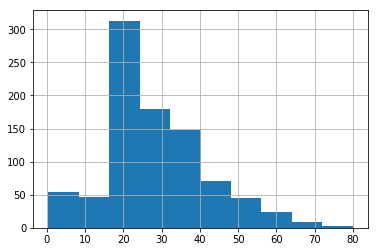

In [41]:
df['Age'].hist();

### Sociological features

**Create a new column with the number of other member of the family.**

In [42]:
df['family'] = df['SibSp'] + df['Parch']

In [43]:
df['family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family, dtype: int64

**Create a new column with ...**

In [44]:
df['socio'] = (df['family'] + 1)*df['Pclass']

In [45]:
df['socio'].value_counts()

3     348
2     174
1     109
6      92
9      47
4      41
18     17
8      13
21     12
15     12
12     10
33      7
24      6
5       2
10      1
Name: socio, dtype: int64

### 'Cabin Number' column

**Have a look at a sample of the 'Cabin' column.**

In [46]:
df['Cabin'].sample(15, random_state = 10)

590      NaN
131      NaN
628      NaN
195      B80
230      C83
646      NaN
75     F G73
586      NaN
569      NaN
287      NaN
666      NaN
43       NaN
600      NaN
284      A19
242      NaN
Name: Cabin, dtype: object

**Create a 'Deck' column with the first letter of the cabin (or NaN).**

In [47]:
df['Deck'] = df['Cabin'].apply(lambda x: x if isinstance(x, float) else x[0])

In [48]:
df['Deck'] .value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

**Create dummy columns for Deck A, F, G, T (and 'other' for the rest).**

In [49]:
df['Deck'] = np.where(df['Deck'].isin(['A', 'F', 'G', 'T']), 'other', df['Deck'])
deck_dummies = pd.get_dummies(df['Deck'], prefix = 'Deck')

In [50]:
deck_dummies.head()

,Deck_B,Deck_C,Deck_D,Deck_E,Deck_other
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,1,0,0,0
4,0,0,0,0,0


**Concatenate the dummies with the data.**

In [51]:
df = pd.concat([df, deck_dummies], axis=1)

In [52]:
df.shape

(891, 22)

## Dropping columns

**Drop columns that will not be used anymore.**

In [53]:
to_drop = ['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked', 'Deck']

In [54]:
df = df.drop(to_drop, axis=1)

## Reordering columns
**We will reorder the the columns of this dataframe to have the target on the right.**  
**We can reindex them using a list.**

In [55]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'sex_lab', 'embarked_lab', 'family', 'socio', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_other'],
      dtype='object')

In [56]:
col_list = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
            'sex_lab', 'embarked_lab', 'family', 'socio', 'Deck_B', 'Deck_C',
            'Deck_D', 'Deck_E', 'Deck_other', 'Survived']

In [57]:
df = df[col_list]

In [58]:
df.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex_lab,embarked_lab,family,socio,Deck_B,Deck_C,Deck_D,Deck_E,Deck_other,Survived
0,1,3,22.0,1,0,7.2500,0,1.0,1,6,0,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,1,2.0,1,2,0,1,0,0,0,1


## Correlation

In [59]:
import seaborn as sns

In [60]:
corr = df.corr()

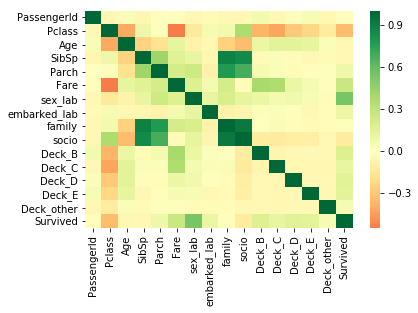

In [61]:
sns.heatmap(corr, center = 0, cmap = 'RdYlGn');

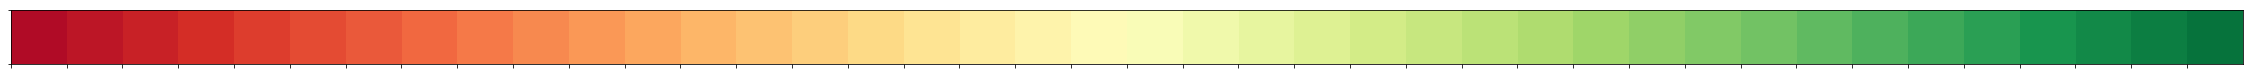

In [74]:
sns.palplot(sns.color_palette('RdYlGn', 40))

In [62]:
df[['family', 'socio', 'SibSp', 'Parch']].corr()

,family,socio,SibSp,Parch
family,1.000000,0.925814,0.890712,0.783111
socio,0.925814,1.000000,0.854492,0.684167
SibSp,0.890712,0.854492,1.000000,0.414838
Parch,0.783111,0.684167,0.414838,1.000000


## _Holdout_

In [80]:
holdout['sex_lab'] = holdout['Sex'].map(dico_sex)

In [81]:
holdout['embarked_lab'] = holdout['Embarked'].map(dico_emb)
holdout['embarked_lab'] = holdout['embarked_lab'].fillna(0)

In [82]:
holdout['Age'] = holdout[['Age', 'Pclass']].apply(lambda x: age_median.loc[x['Pclass']].values[0] if pd.isnull(x['Age'])
                                                  else x['Age'], axis=1)

In [83]:
holdout['family'] = holdout['SibSp'] + holdout['Parch']

In [84]:
holdout['socio'] = (holdout['family'] + 1)*holdout['Pclass']

In [85]:
holdout['Deck'] = holdout['Cabin'].apply(lambda x: x if isinstance(x, float) else x[0])
holdout['Deck'] = np.where(holdout['Deck'].isin(['A', 'F', 'G', 'T']), 'other', holdout['Deck'])
deck_dummies = pd.get_dummies(holdout['Deck'], prefix = 'Deck')
holdout = pd.concat([holdout, deck_dummies], axis=1)

In [87]:
holdout = holdout.drop(to_drop, axis=1)

## saving the dataframes as csv

In [88]:
df.to_csv('data/titanic/titanic_ml.csv')
holdout.to_csv('data/titanic/holdout_ml.csv')